 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [48]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date",
                               infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

    

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date",\
                               infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date",\
                               infer_datetime_format=True,parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types

sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(',','')
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)


/var/folders/68/cb6jdf6s257b4scg8zthmg480000gn/T/ipykernel_88040/1349054646.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')


In [11]:
# Calculate Daily Returns
def daily_returns(prices):
    return prices[:-1] / prices[1:] - 1
daily_returns(sp500_history_df)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.0
2012-10-03,0.0
2012-10-04,0.0
2012-10-05,0.0
...,...
2019-04-16,0.0
2019-04-17,0.0
2019-04-18,0.0


In [12]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns={"Close":"sp500_close"})
sp500_history_df 

,sp500_close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
join_whale_algorithmic_sp500 = pd.concat([sp500_history_df,algo_returns_df,whale_returns_df],axis="columns", join="inner")
join_whale_algorithmic_sp500


,sp500_close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,2933.68,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,2907.97,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,2905.03,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,2900.45,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,2907.06,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...
2015-03-09,2079.43,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,2071.26,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,2101.04,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Algo 2 2015-2019'}, xlabel='Date'>

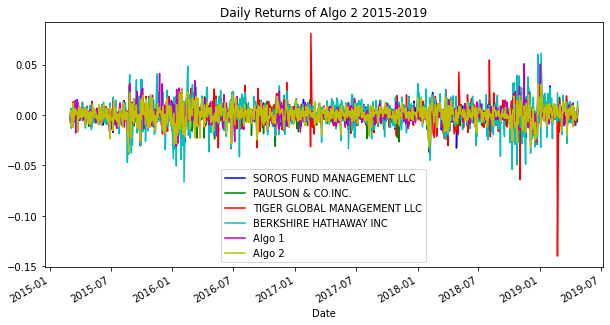

In [15]:
# Plot daily returns of all portfolios
def daily_returns(prices):
    return prices[:-1] / prices[1:] - 1
daily_returns(join_whale_algorithmic_sp500)

join_whale_algorithmic_sp500.dropna(inplace=True)

join_whale_algorithmic_sp500


# plot

cmb_df_soros=join_whale_algorithmic_sp500['SOROS FUND MANAGEMENT LLC']
cmb_df_paulson=join_whale_algorithmic_sp500['PAULSON & CO.INC. ']
cmb_df_tiger=join_whale_algorithmic_sp500['TIGER GLOBAL MANAGEMENT LLC']
cmb_df_berkshire=join_whale_algorithmic_sp500['BERKSHIRE HATHAWAY INC']
cmb_df_algo1=join_whale_algorithmic_sp500['Algo 1']
cmb_df_algo2=join_whale_algorithmic_sp500['Algo 2']
cmb_df_soros.plot (figsize=(10,5), title="Daily Returns of Soros 2015-2019",color='b', legend=True,)
cmb_df_paulson.plot (figsize=(10,5),title="Daily Returns of Paulson 2015-2019",color='g', legend=True)
cmb_df_tiger.plot (figsize=(10,5),title="Daily Returns of Tiger Global 2015-2019",color='r', legend=True)
cmb_df_berkshire.plot (figsize=(10,5),title="Daily Returns of Berkshire Hathaway 2015-2019",color='c', legend=True)
cmb_df_algo1.plot (figsize=(10,5),title="Daily Returns of Algo 1 2015-2019",color='m', legend=True)
cmb_df_algo2.plot (figsize=(10,5),title="Daily Returns of Algo 2 2015-2019",color='y', legend=True)


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Algo 2 2015-2019'}, xlabel='Date'>

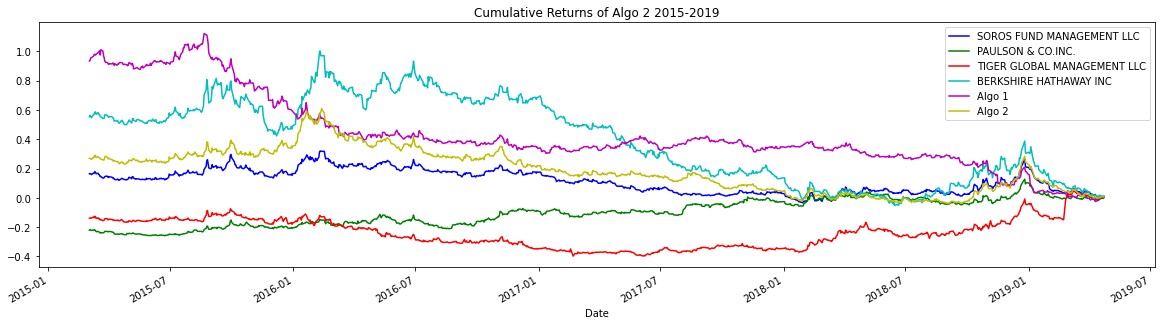

In [16]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

cum_rtn_soros = (1 + cmb_df_soros).cumprod() - 1
cum_rtn_paulson = (1 + cmb_df_paulson).cumprod() - 1
cum_rtn_tiger = (1 + cmb_df_tiger).cumprod() - 1
cum_rtn_berkshire = (1 + cmb_df_berkshire).cumprod() - 1
cum_rtn_algo1 = (1 + cmb_df_algo1).cumprod() - 1
cum_rtn_algo2 = (1 + cmb_df_algo2).cumprod() - 1
cum_rtn_soros.plot(figsize=(20,5), title="Cumulative Returns of Soros 2015-2019",color='b', legend=True)
cum_rtn_paulson.plot(figsize=(20,5), title="Cumulative Returns of Paulson 2015-2019",color='g', legend=True)
cum_rtn_tiger.plot(figsize=(20,5), title="Cumulative Returns of Tiger Global 2015-2019",color='r', legend=True)
cum_rtn_berkshire.plot(figsize=(20,5), title="Cumulative Returns of Berkshire Hathaway 2015-2019",color='c', legend=True)
cum_rtn_algo1.plot(figsize=(20,5), title="Cumulative Returns of Algo 1  2015-2019",color='m', legend=True)
cum_rtn_algo2.plot(figsize=(20,5), title="Cumulative Returns of Algo 2 2015-2019", color='y', legend=True)


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


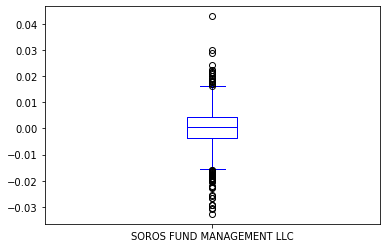

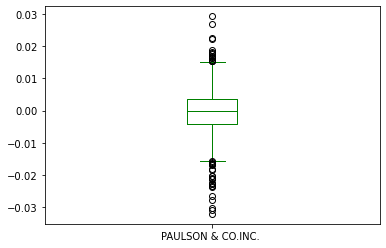

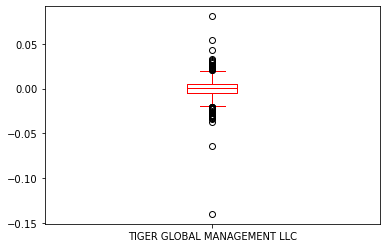

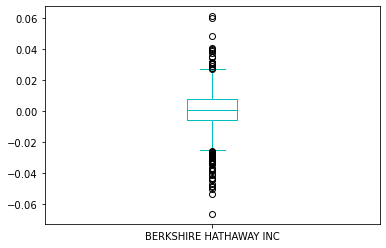

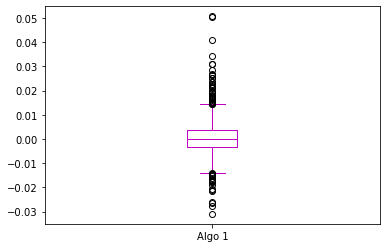

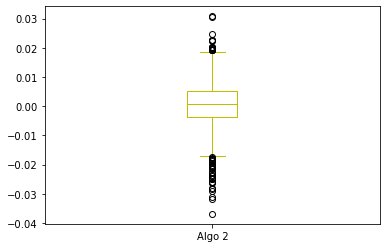

In [17]:
# Box plot to visually show risk
cmb_df_soros_df=cmb_df_soros.to_frame()
cmb_df_paulson_df=cmb_df_paulson.to_frame()
cmb_df_tiger_df=cmb_df_tiger.to_frame()
cmb_df_berkshire_df=cmb_df_berkshire.to_frame()
cmb_df_algo1_df=cmb_df_algo1.to_frame()
cmb_df_algo2_df=cmb_df_algo2.to_frame()
boxplot_soros = cmb_df_soros_df.plot.box(color='b',subplots=True)
boxplot_paulson = cmb_df_paulson_df.plot.box(color='g',subplots=True)
boxplot_tiger = cmb_df_tiger_df.plot.box(color='r',subplots=True)
boxplot_berkshire = cmb_df_berkshire_df.plot.box(color='c',subplots=True)
boxplot_algo1 = cmb_df_algo1_df.plot.box(color='m',subplots=True)
boxplot_algo2 = cmb_df_algo2_df.plot.box(color='y',subplots=True)


### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
join_whale_algorithmic_sp500_std=join_whale_algorithmic_sp500.std()

join_whale_algorithmic_sp500_std

sp500_close                    305.852115
Algo 1                           0.007620
Algo 2                           0.008342
SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
join_whale_algorithmic_sp500_std_SP=join_whale_algorithmic_sp500['sp500_close'].std()
join_whale_algorithmic_sp500_std_SP


# Determine which portfolios are riskier than the S&P 500
join_whale_algorithmic_sp500_std_SP_dict=join_whale_algorithmic_sp500_std.to_dict()

risk_portfolios = [*(dict((k, v) for k, v in join_whale_algorithmic_sp500_std_SP_dict.items() if v > join_whale_algorithmic_sp500_std_SP))]
risk_portfolios





[]

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
join_whale_algorithmic_sp500_alz_std=join_whale_algorithmic_sp500.std()*np.sqrt(252)
join_whale_algorithmic_sp500_alz_std.head(7)



sp500_close                    4855.251803
Algo 1                            0.120967
Algo 2                            0.132430
SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
join_whale_algorithmic_sp500_rlg_std21=join_whale_algorithmic_sp500.rolling(window=21).std()

# Plot the rolling standard deviation

join_whale_algorithmic_sp500_rlg_std21.plot(figsize=(20,5),title='Rlg STD 21D', legend=True
                                            
                                            

SyntaxError: unexpected EOF while parsing (1279404330.py, line 8)

### Calculate and plot the correlation

<AxesSubplot:>

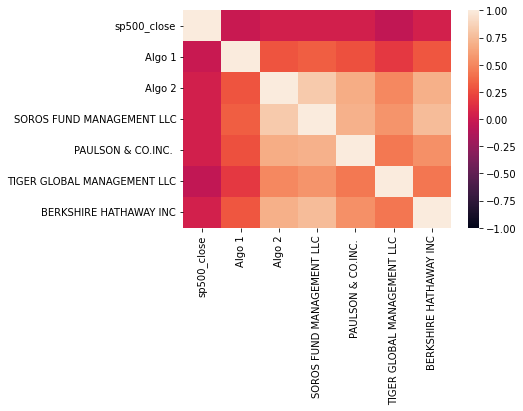

In [49]:
# Calculate the correlation
correlation=join_whale_algorithmic_sp500.corr()
# Display de correlation matrix

correlation.head(7)
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

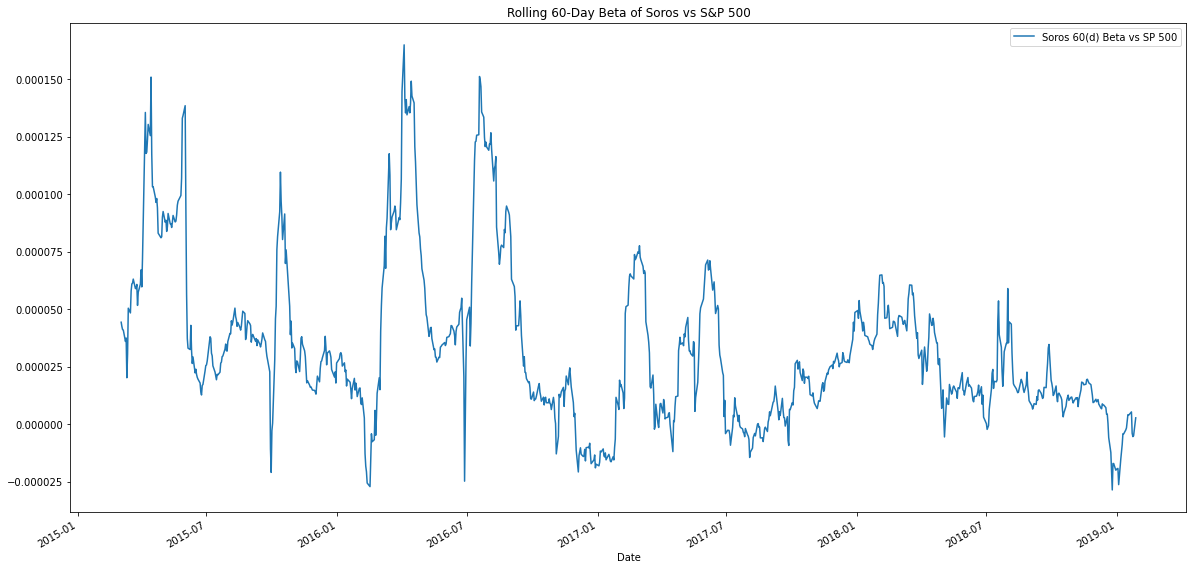

In [71]:
# Calculate covariance of a single portfolio
Soros_covariance = join_whale_algorithmic_sp500['SOROS FUND MANAGEMENT LLC'].cov(join_whale_algorithmic_sp500['sp500_close'])

# Calculate variance of S&P 500
variance = join_whale_algorithmic_sp500['sp500_close'].var()



# Computing beta
soros_beta = Soros_covariance / variance

# Plot beta trend
rlg_soros_covariance = join_whale_algorithmic_sp500['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(join_whale_algorithmic_sp500['sp500_close'])

rlg_variance = join_whale_algorithmic_sp500['sp500_close'].rolling(window=60).var()

rlg_soros_beta = rlg_soros_covariance / rlg_variance

ax2 = rlg_soros_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros vs S&P 500',legend=True)
ax2.legend(["Soros 60(d) Beta vs SP 500"])



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [73]:
# Use `ewm` to calculate the rolling window

cmb_df_soros=join_whale_algorithmic_sp500['SOROS FUND MANAGEMENT LLC']
cmb_df_sp500_close=join_whale_algorithmic_sp500['sp500_close']
soros_ewm = cmb_df_soros.ewm(halflife=21).mean().cov(cmb_df_sp500_close)
sp500_close_ewm = cmb_df_sp500_close
soros_ewm_ratio = soros_ewm / sp500_close_ewm
soros_ewm_ratio


Date
2019-04-23   -0.000001
2019-04-22   -0.000001
2019-04-18   -0.000001
2019-04-17   -0.000001
2019-04-16   -0.000001
                ...   
2015-03-09   -0.000002
2015-03-06   -0.000002
2015-03-05   -0.000002
2015-03-04   -0.000002
2015-03-03   -0.000002
Name: sp500_close, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Annualized Sharpe Ratios

spe_ratios = (join_whale_algorithmic_sp500.mean() * 252) / (join_whale_algorithmic_sp500.std() * np.sqrt(252))
spe_ratios.sort_values(ascending=False, inplace=True)
spe_ratios


sp500_close                    123.476112
Algo 1                           1.378648
BERKSHIRE HATHAWAY INC           0.621810
Algo 2                           0.501364
SOROS FUND MANAGEMENT LLC        0.356417
TIGER GLOBAL MANAGEMENT LLC     -0.121060
PAULSON & CO.INC.               -0.483570
dtype: float64

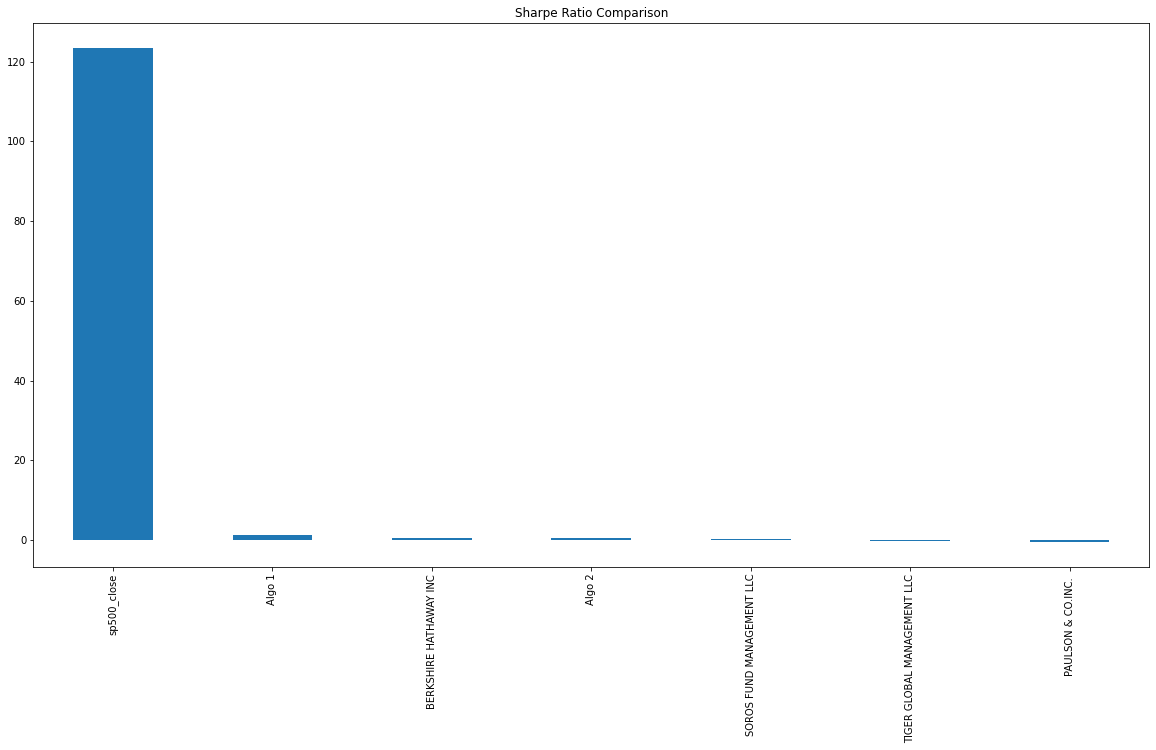

In [75]:
# Visualize the sharpe ratios as a bar plot
ax_spe_ratios = spe_ratios.plot.bar(figsize=(20, 10), title='Sharpe Ratio Comparison')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [99]:
# Reading data from 1st stock

TSLA_df_csv = Path("Resources/TSLA_CLOSING.csv")
TSLA_df = pd.read_csv(TSLA_df_csv, index_col="Date",\
                               infer_datetime_format=True, parse_dates=True)
TSLA_df.head()


,Close
Date,
2022-01-10 16:00:00,1058.12
2022-01-11 16:00:00,1064.40
2022-01-12 16:00:00,1106.22
2022-01-13 16:00:00,1031.56
2022-01-14 16:00:00,1049.61


In [81]:
# Reading data from 2nd stock

AMZN_df_csv = Path("Resources/AMZN_CLOSING.csv")
AMZN_df = pd.read_csv(AMZN_df_csv, index_col="Date",\
                               infer_datetime_format=True, parse_dates=True)
AMZN_df.head()


,Close
Date,
2022-01-10 16:00:00,161.49
2022-01-11 16:00:00,165.36
2022-01-12 16:00:00,165.21
2022-01-13 16:00:00,161.21
2022-01-14 16:00:00,162.14


In [78]:
# Reading data from 3rd stock
GOOG_df_csv = Path("Resources/GOOG_CLOSING.csv")
GOOG_df = pd.read_csv(GOOG_df_csv, index_col="Date",\
                               infer_datetime_format=True, parse_dates=True)
GOOG_df.head()


,Close
Date,
2022-01-10 16:00:00,2771.48
2022-01-11 16:00:00,2800.35
2022-01-12 16:00:00,2832.96
2022-01-13 16:00:00,2782.62
2022-01-14 16:00:00,2795.73


In [83]:
# Combine all stocks in a single DataFrame

concat_df_list=[GOOG_df,AMZN_df,TSLA_df]
concat_df = pd.concat(concat_df_list, axis=1, join="inner", sort=True)
concat_df.head()


,Close,Close,Close
Date,,,
2022-01-10 16:00:00,2771.48,161.49,1058.12
2022-01-11 16:00:00,2800.35,165.36,1064.40
2022-01-12 16:00:00,2832.96,165.21,1106.22
2022-01-13 16:00:00,2782.62,161.21,1031.56
2022-01-14 16:00:00,2795.73,162.14,1049.61


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [86]:
# Calculate daily returns
daily_returns_new=concat_df.pct_change()

# Drop NAs
daily_returns_new.dropna(inplace=True)
daily_returns_new.isna().sum()

# Display sample data
daily_returns_new.head()


,Close,Close,Close
Date,,,
2022-01-11 16:00:00,0.010417,0.023964,0.005935
2022-01-12 16:00:00,0.011645,-0.000907,0.039290
2022-01-13 16:00:00,-0.017769,-0.024212,-0.067491
2022-01-14 16:00:00,0.004711,0.005769,0.017498
2022-01-18 16:00:00,-0.025010,-0.019859,-0.018197


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_concat_df = daily_returns_new.dot(weights)

# Display sample data
portfolio_returns_concat_df.head()


Date
2022-01-11 16:00:00    0.013439
2022-01-12 16:00:00    0.016676
2022-01-13 16:00:00   -0.036491
2022-01-14 16:00:00    0.009326
2022-01-18 16:00:00   -0.021022
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# Join your returns DataFrame to the original returns DataFrame

combined_df_tot_list=[portfolio_returns_concat_df, daily_returns_new]
combined_df_tot = pd.concat(combined_df_tot_list, axis=1, join="inner")
combined_df_tot



,0,Close,Close,Close
Date,,,,
2022-01-11 16:00:00,0.013439,0.010417,0.023964,0.005935
2022-01-12 16:00:00,0.016676,0.011645,-0.000907,0.039290
2022-01-13 16:00:00,-0.036491,-0.017769,-0.024212,-0.067491
2022-01-14 16:00:00,0.009326,0.004711,0.005769,0.017498
2022-01-18 16:00:00,-0.021022,-0.025010,-0.019859,-0.018197
...,...,...,...,...
2022-05-20 16:00:00,-0.024861,-0.012935,0.002516,-0.064165
2022-05-23 16:00:00,0.012607,0.021530,-0.000279,0.016569
2022-05-24 16:00:00,-0.050943,-0.051408,-0.032168,-0.069255


In [91]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df_tot.dropna(inplace=True)
combined_df_tot.rename(columns={0: " Returns P"}, inplace=True)
combined_df_tot


,Returns P,Close,Close,Close
Date,,,,
2022-01-11 16:00:00,0.013439,0.010417,0.023964,0.005935
2022-01-12 16:00:00,0.016676,0.011645,-0.000907,0.039290
2022-01-13 16:00:00,-0.036491,-0.017769,-0.024212,-0.067491
2022-01-14 16:00:00,0.009326,0.004711,0.005769,0.017498
2022-01-18 16:00:00,-0.021022,-0.025010,-0.019859,-0.018197
...,...,...,...,...
2022-05-20 16:00:00,-0.024861,-0.012935,0.002516,-0.064165
2022-05-23 16:00:00,0.012607,0.021530,-0.000279,0.016569
2022-05-24 16:00:00,-0.050943,-0.051408,-0.032168,-0.069255


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [92]:
# Calculate the annualized `std`
new_alz_std=daily_returns_new.std()*np.sqrt(252)
new_alz_std


Close    0.373995
Close    0.549520
Close    0.703675
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling StD 21(d) of GOOG, TSLA, AMZN'}, xlabel='Date'>

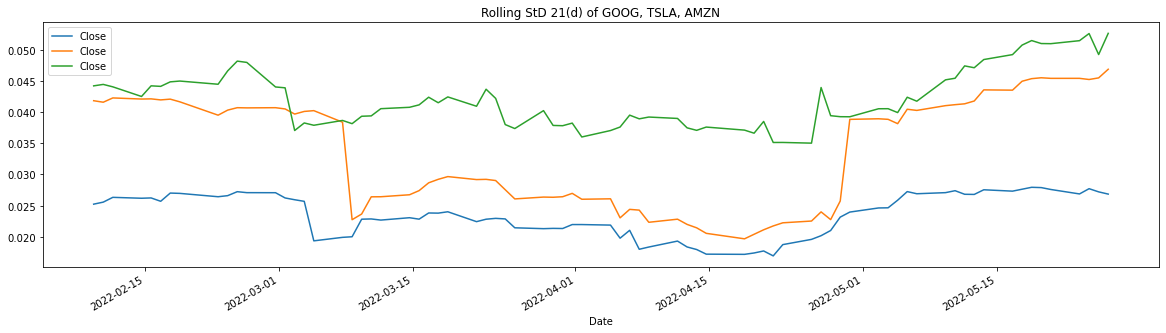

In [94]:
# Calculate rolling standard deviation

rlg_std_21W=daily_returns_new.rolling(window=21).std()

# Plot rolling standard deviation

rlg_std_21W.plot(figsize=(20,5),title="Rlng StD 21(d) of GOOG, TSLA, AMZN", legend=True)


### Calculate and plot the correlation

<AxesSubplot:>

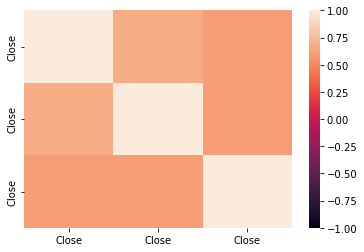

In [96]:
# Calculate and plot the correlation

correlation_new=daily_returns_new.corr()

sns.heatmap(correlation_new, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [103]:
# Calculate and plot Beta
daily_returns_new_stk=daily_returns_new[['close','close', 'close']]



KeyError: "None of [Index(['close', 'close', 'close'], dtype='object')] are in the [columns]"

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [104]:
# Calculate Annualized Sharpe Ratios

spe_ratios_new = (daily_returns_new.mean() * 252) / (daily_returns_new.std() * np.sqrt(252))
spe_ratios_new.sort_values(ascending=False, inplace=True)

spe_ratios_dict_new=spe_ratios_new.to_dict()
spe_ratios_new


Close   -1.160421
Close   -1.528193
Close   -1.561567
dtype: float64

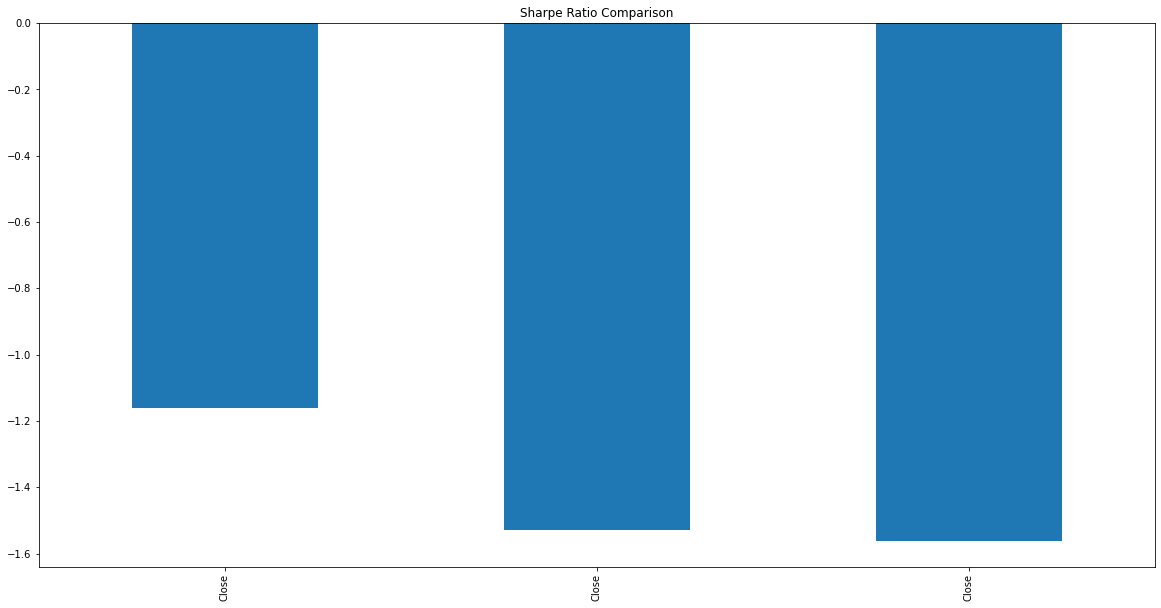

In [105]:
# Visualize the sharpe ratios as a bar plot

ax_spe_ratios = spe_ratios_new.plot.bar(figsize=(20, 10), title='Sharpe Ratio Comparison')



### How does your portfolio do?

Write your answer here!

In [ ]:
close 1 performs the best. 